# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q6&8/Iris.csv')

# Data Exploration

In [ ]:
df_iris

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2
...,...,...,...,...,...,...
145,145,3,67,30,52,23
146,146,3,63,25,50,19
147,147,3,65,30,52,20
148,148,3,62,34,54,23


drop unnamed column

In [ ]:
df_iris.drop('Unnamed: 0', axis=1, inplace=True)
df_iris

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


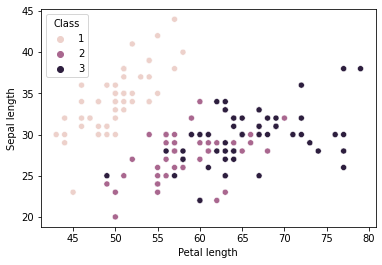

In [ ]:
sns.scatterplot(data=df_iris, x="Petal length", y="Sepal length", hue="Class")

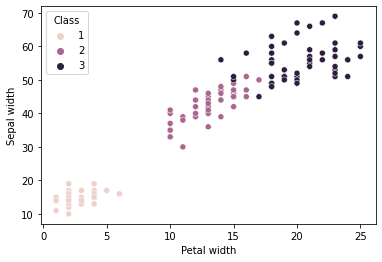

In [ ]:
sns.scatterplot(data=df_iris, x="Petal width", y="Sepal width", hue="Class")

In [ ]:
X = df_iris.drop('Class', axis=1)
y = df_iris['Class']

Scaling Data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f'accuracy on train: {svc.score(X_train, y_train)}')
print(f'accuracy on test: {accuracy_score(y_test, y_pred)}')

accuracy on train: 0.9833333333333333
accuracy on test: 0.9666666666666667


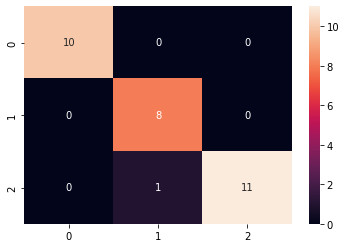

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

# Part a

In [ ]:
deg_list = np.arange(1, 11)
test_accuracy = np.empty(len(deg_list))
train_accuracy = np.empty(len(deg_list))

for i, deg in enumerate(deg_list):
  svc = SVC(kernel="poly", degree=deg)
  svc.fit(X_train, y_train)
  
  train_accuracy[i] = svc.score(X_train, y_train)
  
  y_pred = svc.predict(X_test)
  test_accuracy[i] = accuracy_score(y_pred, y_test)

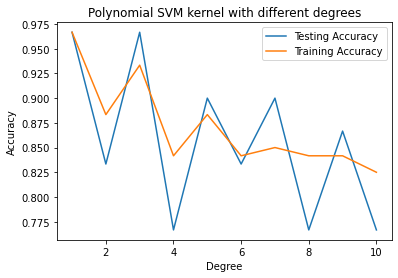

In [ ]:
plt.title('Polynomial SVM kernel with different degrees')
plt.plot(deg_list, test_accuracy, label = 'Testing Accuracy')
plt.plot(deg_list, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

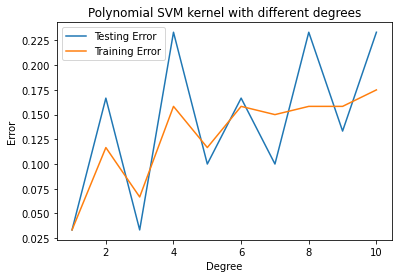

In [ ]:
plt.title('Polynomial SVM kernel with different degrees')
plt.plot(deg_list, 1-test_accuracy, label = 'Testing Error')
plt.plot(deg_list, 1-train_accuracy, label = 'Training Error')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

In [ ]:
print(f'Min error is {1-max(test_accuracy)} for degree={np.argmax(test_accuracy)+1}')
print(f'Max accuracy is {max(test_accuracy)} for degree={np.argmax(test_accuracy)+1}')

Min error is 0.033333333333333326 for degree=1
Max accuracy is 0.9666666666666667 for degree=1


# Part b

best degree is 1

In [ ]:
svc = SVC(kernel="poly", degree=deg)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f'accuracy on train: {svc.score(X_train, y_train)}')
print(f'accuracy on test: {accuracy_score(y_test, y_pred)}')

accuracy on train: 0.825
accuracy on test: 0.7666666666666667


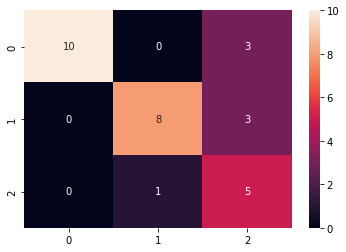

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)